<a href="https://colab.research.google.com/github/zodplugin/PengolahanCitra/blob/main/M1_Pengolahan_Citra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Convert Image To RGB

In [13]:
import matplotlib.pyplot as plt
import numpy
import colorsys
import cv2
import pandas as pd
from PIL import Image
im = Image.open('muhehe.png').convert("RGB")
image = im.resize((250, 300))
pixels = list(image.getdata())

In [75]:
output = pd.DataFrame(pixels)
df = output.rename(columns={0: 'Red',1 : "Green", 2: "Blue"})
df

,Red,Green,Blue
0,232,85,94
1,231,84,93
2,232,85,94
3,232,85,94
4,233,86,95
...,...,...,...
74995,233,86,95
74996,232,85,94
74997,232,85,94
74998,232,85,94


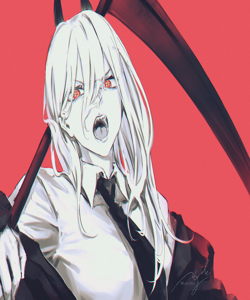

In [15]:
image

## 2. Show Histogram Value From Image

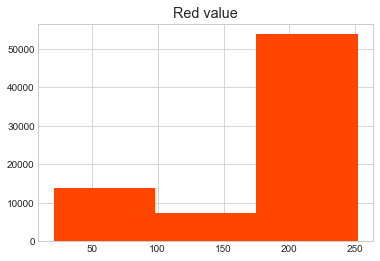

In [57]:
# Set title
plt.title("Red value")
plt.style.use('seaborn-whitegrid')
plt.hist(df["Red"], color = "orangered", bins=3)
plt.show()

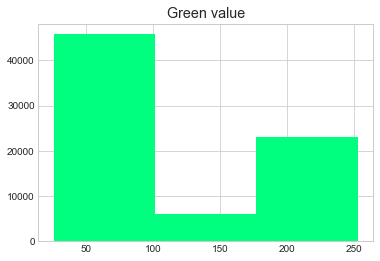

In [58]:
# Set title
plt.title("Green value")
plt.style.use('seaborn-whitegrid')
plt.hist(df["Green"], color="springgreen", bins=3)
plt.show()


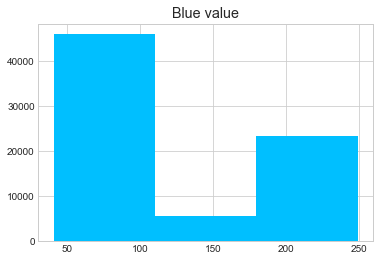

In [59]:
# Set title
plt.title("Blue value")
plt.style.use('seaborn-whitegrid')
plt.hist(df["Blue"], color="deepskyblue", bins=3)
plt.show()


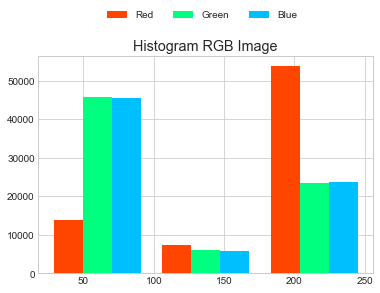

In [74]:
# Set title
plt.title("Histogram RGB Image")
plt.style.use('seaborn-whitegrid')
plt.hist(df, color=["orangered", "springgreen", "deepskyblue"], bins=3, label=["Red","Green","Blue"])

plt.legend(bbox_to_anchor=(0.80, 1.25), ncol=3)

plt.show()


## 3. Show HSL Value From Image

In [4]:
# Convert the image to the HSL color space
image = cv2.imread("muhehe.png")
resized_image = cv2.resize(image, (250, 300))
hsl_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2HLS)


In [5]:
# Extract HSL channels
h_channel, l_channel, s_channel = cv2.split(hsl_image)

In [6]:
cv2.imwrite('hsl_image.jpg', hsl_image)

True

In [7]:
cv2.imshow('HSL Image', hsl_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
h_hist = pd.DataFrame(h_channel)
h_hist

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,178,178,178,178,178,178,178,178,178,178,...,178,178,178,178,178,178,178,178,178,178
1,178,178,178,178,178,178,178,178,178,178,...,178,178,178,178,178,178,178,178,178,178
2,178,178,178,178,178,178,178,178,178,178,...,178,178,178,178,178,178,178,178,178,178
3,178,178,178,178,178,178,178,178,178,178,...,178,178,178,178,178,178,178,178,178,178
4,178,178,178,178,178,178,178,178,178,178,...,178,178,178,178,178,178,178,178,178,178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,115,127,4,160,17,23,22,15,18,22,...,178,178,178,178,178,178,178,178,178,178
296,161,2,17,155,74,21,52,16,14,94,...,178,178,178,178,178,178,178,178,178,178
297,0,18,8,17,110,21,25,37,11,137,...,178,178,178,178,178,178,178,178,178,178
298,26,18,15,20,113,21,20,20,104,142,...,178,178,178,178,178,178,178,178,178,178


In [41]:
def create_hls_array(image):
    
    """
    Creates a numpy array holding the hue, lightness
    and saturation values for the Pillow image.
    """

    pixels = image.load()

    hls_array = numpy.empty(shape=(image.height, image.width, 3), dtype=float)

    for row in range(0, image.height):

        for column in range(0, image.width):

            rgb = pixels[column, row]

            hls = colorsys.rgb_to_hls(rgb[0]/255, rgb[1]/255, rgb[2]/255)

            hls_array[row, column, 0] = hls[0]
            hls_array[row, column, 1] = hls[1]
            hls_array[row, column, 2] = hls[2]

    return hls_array

In [42]:
hasil = create_hls_array(im)

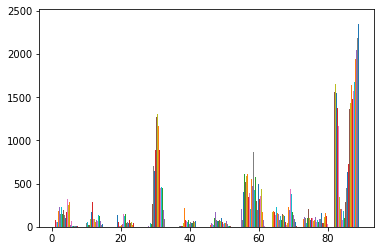

In [46]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('muhehe.png')

# Convert the image to HLS color space
hls_image = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)

# Split the HLS channels
hue, lightness, saturation = cv2.split(hls_image)

# Normalize the values to the range [0, 255]
hue = (hue / 2)  # Hue values are in the range [0, 180]
lightness = (lightness / 2)  # Lightness values are in the range [0, 255]
saturation = (saturation / 2)  # Saturation values are in the range [0, 255]

# Convert the channels to NumPy arrays
hue_array = np.array(hue)
lightness_array = np.array(lightness)
saturation_array = np.array(saturation)



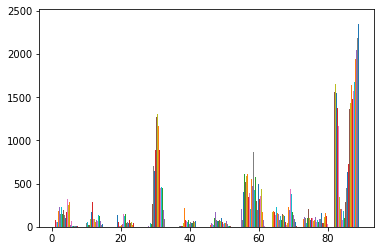

In [47]:
hist = plt.hist(hue_array)

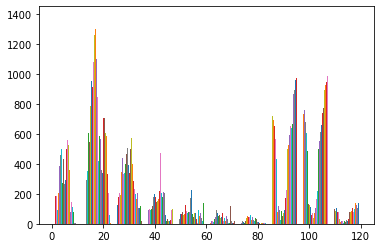

In [48]:
hist = plt.hist(saturation_array)


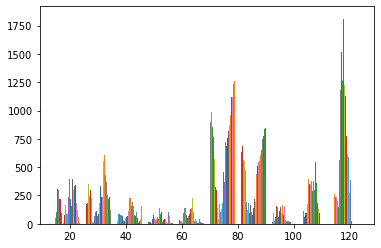

In [49]:
hist = plt.hist(lightness_array)